# Task 1: Generate random row indices
Read in the data and create a random sample of 500 row indices with your own student_ID.

In [2]:
library(tidyverse)
segmm <- read.csv("sgemm_product.csv")
segmm <- segmm %>% 
    rename(Run1 = Run1..ms.) %>% 
    rename(Run2 = Run2..ms.) %>% 
    rename(Run3 = Run3..ms.) %>% 
    rename(Run4 = Run4..ms.)

set.seed(686249907)
my_sample <- sample(1:nrow(segmm), 500)

── Attaching packages ─────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Task 2: Backward stepwise selection
## Step 2.1: calculate log(time) for run 1
Use run 1 as an example, calculate log(time) for run 1 for the entire data set, excludes non relevant columns (e.g. the original run1 time, and other runs’ time), and then subset to 500 rows by the random indices generated.

In [3]:
segmm1 <- segmm %>%
    mutate(logrun1 = log(Run1)) %>%
    select(-Run1, -Run2, -Run3, -Run4)
segmm1 <- segmm1[my_sample, ]
segmm1

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,logrun1
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
186893,128,64,32,8,16,32,8,2,1,4,1,1,0,0,5.444148
187802,128,64,32,8,32,8,8,8,2,2,1,0,0,1,3.792564
193312,128,64,32,16,16,8,16,2,1,2,1,1,1,1,3.570659
195514,128,64,32,16,16,32,16,8,4,4,1,0,0,1,3.656098
17244,16,128,32,8,32,16,16,8,1,4,1,0,1,1,3.845670
126673,64,128,32,8,16,8,8,8,4,8,0,0,0,0,5.632931
15845,16,128,32,8,16,8,16,8,1,4,0,1,0,0,3.684871
45387,32,64,32,16,32,32,32,2,1,1,1,0,1,0,4.074142
28469,32,32,32,8,16,32,8,8,1,2,0,1,0,0,4.220390


## Step 2.2: perform backward stepwise selection
Using the leaps package, as in class, run backwards stepwise selection to predict timings from the logarithm of time for first run on models with all 14 predictors and all two-way interactions. Look at models with up to 20 variables (e.g. nvmax = 20). Plot the apparent error against the number of predictors.

Hint: R formula has a simple way of incorporating (all) interaction terms. E.g.lm(Y~.^2) will fit a linear regression model for Y with ALL the individual predictors, AND all the 2-way interactions.

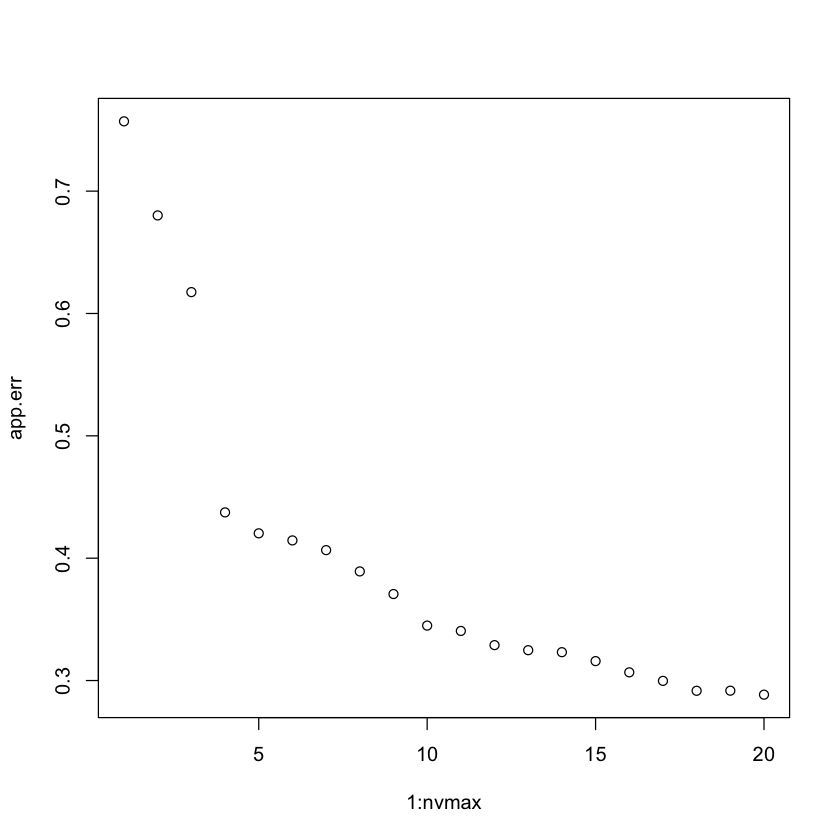

In [3]:
library(leaps)

mf <- model.frame(logrun1~.^2, data = segmm1)
X <- model.matrix(logrun1~.^2, mf)[,-1]

nvmax <- 20
subset1.reg <- regsubsets(x = X, y = segmm1$logrun1,
                         nvmax = nvmax, method = 'backward')
summ <- summary(subset1.reg)
app.err <- summ$rss / (nrow(segmm1) - 1:nvmax)
plot(x = 1:nvmax, y = app.err)

# Task 3: Cross validation
Using cross-validation, select a tuning parameter λ amongst the candidate set {2,4,6,8,10,12} so that minimising $nlogRSS+\lambda p$ gives good mean squared prediction error, and select a predictive model.

You would find the following code snippet (from lecture) useful.

In [4]:
all_yhat <- function(xtrain, ytrain, xtest, lambdas, nvmax=50){
  n <- nrow(xtrain)
  yhat <- matrix(nrow = nrow(xtest), ncol = length(lambdas))
  search <- regsubsets(xtrain, ytrain, nvmax=nvmax, method="back")
  summ <- summary(search)
  for (i in seq_along(lambdas)) {
    penMSE <- n*log(summ$rss) + lambdas[i]*(1:nvmax)
    best <- which.min(penMSE)  #lowest AIC
    betahat <- coef(search, best) #coefficients
    xinmodel <- cbind(1, xtest)[, summ$which[best,]] #predictors in that model
    yhat[,i] <- xinmodel %*% betahat
  }
  yhat
}

In [5]:
y <- segmm1$logrun1
n <- nrow(X)

folds <- sample(rep(1:10, length.out = n))
lambdas <- seq(2, 12, 2)
fitted <- matrix(nrow=n, ncol=length(lambdas))
for (i in 1:10) {
    train <- (1:n)[folds!=i]
    test <- (1:n)[folds==i]
    # fit and calculate MSPE
    fitted[test,] <- all_yhat(X[train,], y[train], X[test,], lambdas)
}
# find min --> best lambda
rbind(lambdas, colMeans((y-fitted)^2))

lambdas,2.0000000,4.0000000,6.0000000,8.000000,10.0000000,12.000000
,0.3695334,0.3655118,0.3508089,0.368111,0.3634733,0.376297


The minimum MSPE across validation folds was achieved using $\lambda = 6$

# Task 4: Estimate MSPE
## Step 4.1: MSPE for the sample dataset
Estimate the actual mean squared prediction error of your model using the second replicate of the experiment (log(Run2)) in your sample data set.

In [6]:
segmm2 <- segmm %>%
    mutate(logrun2 = log(Run2)) %>%
    select(-Run1, -Run2, -Run3, -Run4)
segmm2_sample <- segmm2[my_sample, ]

mf <- model.frame(logrun2~.^2, data = segmm2_sample)
X <- model.matrix(logrun2~.^2, mf)[,-1]

y <- segmm2_sample$logrun2
n <- nrow(X)

lambda <- 6

folds <- sample(rep(1:10, length.out = n))
lambdas <- 6
fitted <- matrix(nrow=n, ncol=length(lambdas))
for (i in 1:10) {
    train <- (1:n)[folds!=i]
    test <- (1:n)[folds==i]
    # fit and calculate MSPE
    fitted[test,] <- all_yhat(X[train,], y[train], X[test,], 6)
}
# find min --> best lambda
colMeans((y-fitted)^2)

[1] 0.3764591

## Step 4.2: MSPE for the entire dataset
Estimate the actual mean squared prediction error of your model using the second replicate of the experiment (log(Run2)) on all 261,400 observations. Compare your results with 4.1 above.

In [7]:
mf <- model.frame(logrun2~.^2, data = segmm2)
X <- model.matrix(logrun2~.^2, mf)[,-1]

y <- segmm2$logrun2
n <- nrow(X)

lambda <- 6

# reduce to 2 folds for computation time
folds <- sample(rep(1:2, length.out = n))
lambdas <- 6
fitted <- matrix(nrow=n, ncol=length(lambdas))
for (i in 1:2) {
    train <- (1:n)[folds!=i]
    test <- (1:n)[folds==i]
    # fit and calculate MSPE
    fitted[test,] <- all_yhat(X[train,], y[train], X[test,], 6)
}
# find min --> best lambda
colMeans((y-fitted)^2)

[1] 0.2929836

When the model is trained and tested on the full set of observations, the Mean Squared Prediction Error is less than when the model is trained only on the small sample set.

## EOF